In [1]:
import numpy as np

In [2]:
import torch

In [3]:
from __future__ import print_function
import argparse
import numpy  as np
from PIL import Image
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from torch.utils.data.sampler import SubsetRandomSampler
from torchvision import transforms

In [4]:
import data_loaders

In [5]:
from data_loaders import Plain_Dataset, eval_data_dataloader

In [6]:
from GWA import GWA

In [7]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

/home/youssef/.local/lib/python3.8/site-packages/torch/cuda/__init__.py:138: UserWarning: CUDA initialization: The NVIDIA driver on your system is too old (found version 11070). Please update your GPU driver by downloading and installing a new version from the URL: http://www.nvidia.com/Download/index.aspx Alternatively, go to: https://pytorch.org to install a PyTorch version that has been compiled with your version of the CUDA driver. (Triggered internally at ../c10/cuda/CUDAFunctions.cpp:108.)
  return torch._C._cuda_getDeviceCount() > 0


In [51]:
def Train(epochs,train_loader,val_loader,criterion,optmizer,device):
    '''
    Training Loop
    '''
    print("===================================Start Training===================================")
    for e in range(epochs):
        train_loss = 0
        validation_loss = 0
        train_correct = 0
        val_correct = 0
        # Train the model  #
        net.train()
        count = 0
        for data, labels in train_loader:
            data, labels = data.to(device), labels.to(device)
            optmizer.zero_grad()
            outputs = net(data)
            #print(outputs[0])
            #print(outputs[0])
            count += 1
            #print(count)
            loss = criterion(outputs,labels)
            #print(labels[0])
             
            loss.backward()
            optmizer.step()
            train_loss += loss.item()
            _, preds = torch.max(outputs,1)
            train_correct += torch.sum(preds == labels.data)

        #validate the model#
        net.eval()
        for data,labels in val_loader:
            data, labels = data.to(device), labels.to(device)
            val_outputs = net(data)
            #print(val_outputs[0][3])
            #print(labels[0])
            val_loss = criterion(val_outputs, labels)
            validation_loss += val_loss.item()
            _, val_preds = torch.max(val_outputs,1)
            val_correct += torch.sum(val_preds == labels.data)

        train_loss = train_loss/len(train_dataset)
        train_acc = train_correct.double() / len(train_dataset)
        validation_loss =  validation_loss / len(validation_dataset)
        val_acc = val_correct.double() / len(validation_dataset)
        print('Epoch: {} \tTraining Loss: {:.8f} \tValidation Loss {:.8f} \tTraining Acuuarcy {:.3f}% \tValidation Acuuarcy {:.3f}%'
                                                           .format(e+1, train_loss,validation_loss,train_acc * 100, val_acc*100))

    torch.save(net.state_dict(),'deep_emotion-{}-{}-{}.pt'.format(epochs,batchsize,lr))
    print("===================================Training Finished===================================")



In [9]:
parser = argparse.ArgumentParser(description="Configuration of setup and training process")
parser.add_argument('-s', '--setup', type=bool, help='setup the dataset for the first time')
  

_StoreAction(option_strings=['-s', '--setup'], dest='setup', nargs=None, const=None, default=None, type=<class 'bool'>, choices=None, help='setup the dataset for the first time', metavar=None)

In [10]:
parser.add_argument('-d', '--data', type=str,required= True,
                               help='data folder that contains data files that downloaded from kaggle (train.csv and test.csv)')
    

_StoreAction(option_strings=['-d', '--data'], dest='data', nargs=None, const=None, default=None, type=<class 'str'>, choices=None, help='data folder that contains data files that downloaded from kaggle (train.csv and test.csv)', metavar=None)

In [11]:
parser.add_argument('-hparams', '--hyperparams', type=bool,
                               help='True when changing the hyperparameters e.g (batch size, LR, num. of epochs)')
    

_StoreAction(option_strings=['-hparams', '--hyperparams'], dest='hyperparams', nargs=None, const=None, default=None, type=<class 'bool'>, choices=None, help='True when changing the hyperparameters e.g (batch size, LR, num. of epochs)', metavar=None)

In [12]:
parser.add_argument('-e', '--epochs', type= int, help= 'number of epochs')
parser.add_argument('-lr', '--learning_rate', type= float, help= 'value of learning rate')
parser.add_argument('-bs', '--batch_size', type= int, help= 'training/validation batch size')
parser.add_argument('-t', '--train', type=bool, help='True when training')
    

_StoreAction(option_strings=['-t', '--train'], dest='train', nargs=None, const=None, default=None, type=<class 'bool'>, choices=None, help='True when training', metavar=None)

In [13]:
epochs = 1500
lr = 0.001
batchsize = 128

In [14]:
net = GWA()

In [15]:
net.to(device)

GWA(
  (conv1): Conv2d(15, 10, kernel_size=(3, 3), stride=(1, 1))
  (dropout1): Dropout(p=0.25, inplace=False)
  (conv2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
  (dropout2): Dropout(p=0.25, inplace=False)
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (grid_attention): GridAttention(
    (conv1): Conv2d(3, 10, kernel_size=(7, 7), stride=(2, 2))
    (conv2): Conv2d(10, 15, kernel_size=(7, 7), stride=(2, 2))
  )
  (conv3): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
  (dropout3): Dropout(p=0.25, inplace=False)
  (conv4): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
  (dropout4): Dropout(p=0.25, inplace=False)
  (pool4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (norm): BatchNorm2d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=250, out_features=100, bias=True)
  (fc2): Linear(in_features=100, out_features=8, bias=True)
  (softmax): Softmax(di

In [16]:
print("Model archticture: ", net)

Model archticture:  GWA(
  (conv1): Conv2d(15, 10, kernel_size=(3, 3), stride=(1, 1))
  (dropout1): Dropout(p=0.25, inplace=False)
  (conv2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
  (dropout2): Dropout(p=0.25, inplace=False)
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (grid_attention): GridAttention(
    (conv1): Conv2d(3, 10, kernel_size=(7, 7), stride=(2, 2))
    (conv2): Conv2d(10, 15, kernel_size=(7, 7), stride=(2, 2))
  )
  (conv3): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
  (dropout3): Dropout(p=0.25, inplace=False)
  (conv4): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
  (dropout4): Dropout(p=0.25, inplace=False)
  (pool4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (norm): BatchNorm2d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=250, out_features=100, bias=True)
  (fc2): Linear(in_features=100, out_features=8, bias=True)
  (

In [17]:
transformation= transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,),(0.5,))])

In [18]:
traincsv_file = "data2" + "/"+"train.csv"
validationcsv_file = "data2" + "/"+"val.csv"

In [19]:
train_img_dir = "data2"+"/"+"train/"

In [20]:
validation_img_dir = "data2"+"/"+"val/"

In [21]:
train_dataset= Plain_Dataset(csv_file=traincsv_file, img_dir = train_img_dir, datatype = 'train', transform = transformation)


In [22]:
validation_dataset= Plain_Dataset(csv_file=validationcsv_file, img_dir = validation_img_dir, datatype = 'val', transform = transformation)


In [23]:
train_loader= DataLoader(train_dataset,batch_size=batchsize,shuffle = True,num_workers=0)
val_loader=   DataLoader(validation_dataset,batch_size=batchsize,shuffle = True,num_workers=0)

In [44]:
criterion= nn.CrossEntropyLoss()
optmizer= optim.Adam(net.parameters(),lr= 0.0001, weight_decay = 0.0001)


In [52]:
Train(epochs, train_loader, val_loader, criterion, optmizer, device)

===================================Start Training===================================
Epoch: 1 	Training Loss: 0.01277538 	Validation Loss 0.01386291 	Training Acuuarcy 64.120% 	Validation Acuuarcy 56.279%
Epoch: 2 	Training Loss: 0.01278677 	Validation Loss 0.01377293 	Training Acuuarcy 64.006% 	Validation Acuuarcy 56.771%
Epoch: 3 	Training Loss: 0.01280969 	Validation Loss 0.01373527 	Training Acuuarcy 63.729% 	Validation Acuuarcy 57.721%
Epoch: 4 	Training Loss: 0.01278815 	Validation Loss 0.01370690 	Training Acuuarcy 63.952% 	Validation Acuuarcy 58.037%
Epoch: 5 	Training Loss: 0.01278301 	Validation Loss 0.01365626 	Training Acuuarcy 63.996% 	Validation Acuuarcy 58.424%
Epoch: 6 	Training Loss: 0.01276833 	Validation Loss 0.01380179 	Training Acuuarcy 64.211% 	Validation Acuuarcy 56.595%
Epoch: 7 	Training Loss: 0.01280394 	Validation Loss 0.01371247 	Training Acuuarcy 63.763% 	Validation Acuuarcy 58.459%
Epoch: 8 	Training Loss: 0.01277542 	Validation Loss 0.01380008 	Training A

KeyboardInterrupt: 

Epoch: 1288 	Training Loss: 0.01141825 	Validation Loss 0.01391885 	Training Acuuarcy 81.564% 	Validation Acuuarcy 55.470%
Epoch: 1289 	Training Loss: 0.01144086 	Validation Loss 0.01386501 	Training Acuuarcy 81.271% 	Validation Acuuarcy 56.103%
Epoch: 1290 	Training Loss: 0.01142073 	Validation Loss 0.01387236 	Training Acuuarcy 81.572% 	Validation Acuuarcy 55.540%
Epoch: 1291 	Training Loss: 0.01142113 	Validation Loss 0.01394017 	Training Acuuarcy 81.572% 	Validation Acuuarcy 54.696%
Epoch: 1292 	Training Loss: 0.01141470 	Validation Loss 0.01388327 	Training Acuuarcy 81.619% 	Validation Acuuarcy 55.434%
Epoch: 1293 	Training Loss: 0.01141515 	Validation Loss 0.01384790 	Training Acuuarcy 81.623% 	Validation Acuuarcy 55.786%
Epoch: 1294 	Training Loss: 0.01143185 	Validation Loss 0.01386332 	Training Acuuarcy 81.408% 	Validation Acuuarcy 55.751%
Epoch: 1295 	Training Loss: 0.01141594 	Validation Loss 0.01383967 	Training Acuuarcy 81.623% 	Validation Acuuarcy 55.364%
Epoch: 1296 	Tra

Epoch: 1355 	Training Loss: 0.01123315 	Validation Loss 0.01384913 	Training Acuuarcy 84.027% 	Validation Acuuarcy 56.314%
Epoch: 1356 	Training Loss: 0.01122871 	Validation Loss 0.01381508 	Training Acuuarcy 84.133% 	Validation Acuuarcy 56.384%
Epoch: 1357 	Training Loss: 0.01121503 	Validation Loss 0.01386030 	Training Acuuarcy 84.234% 	Validation Acuuarcy 56.068%
Epoch: 1358 	Training Loss: 0.01121445 	Validation Loss 0.01387954 	Training Acuuarcy 84.340% 	Validation Acuuarcy 56.173%
Epoch: 1359 	Training Loss: 0.01120956 	Validation Loss 0.01384921 	Training Acuuarcy 84.383% 	Validation Acuuarcy 55.927%
Epoch: 1360 	Training Loss: 0.01121128 	Validation Loss 0.01384813 	Training Acuuarcy 84.415% 	Validation Acuuarcy 56.103%
Epoch: 1361 	Training Loss: 0.01119806 	Validation Loss 0.01384961 	Training Acuuarcy 84.465% 	Validation Acuuarcy 56.103%
Epoch: 1362 	Training Loss: 0.01123728 	Validation Loss 0.01373248 	Training Acuuarcy 84.003% 	Validation Acuuarcy 56.841%
Epoch: 1363 	Tra

Epoch: 1422 	Training Loss: 0.01110957 	Validation Loss 0.01376655 	Training Acuuarcy 85.612% 	Validation Acuuarcy 56.947%
Epoch: 1423 	Training Loss: 0.01110152 	Validation Loss 0.01380601 	Training Acuuarcy 85.765% 	Validation Acuuarcy 56.630%
Epoch: 1424 	Training Loss: 0.01111480 	Validation Loss 0.01375035 	Training Acuuarcy 85.526% 	Validation Acuuarcy 57.369%
Epoch: 1425 	Training Loss: 0.01111961 	Validation Loss 0.01378995 	Training Acuuarcy 85.511% 	Validation Acuuarcy 56.454%
Epoch: 1426 	Training Loss: 0.01110281 	Validation Loss 0.01375477 	Training Acuuarcy 85.765% 	Validation Acuuarcy 57.263%
Epoch: 1427 	Training Loss: 0.01107926 	Validation Loss 0.01375760 	Training Acuuarcy 86.035% 	Validation Acuuarcy 57.052%
Epoch: 1428 	Training Loss: 0.01111596 	Validation Loss 0.01375398 	Training Acuuarcy 85.530% 	Validation Acuuarcy 56.877%
Epoch: 1429 	Training Loss: 0.01110399 	Validation Loss 0.01375287 	Training Acuuarcy 85.699% 	Validation Acuuarcy 56.419%
Epoch: 1430 	Tra

Epoch: 1489 	Training Loss: 0.01104753 	Validation Loss 0.01374787 	Training Acuuarcy 86.376% 	Validation Acuuarcy 57.334%
Epoch: 1490 	Training Loss: 0.01103496 	Validation Loss 0.01376528 	Training Acuuarcy 86.607% 	Validation Acuuarcy 57.228%
Epoch: 1491 	Training Loss: 0.01104540 	Validation Loss 0.01377711 	Training Acuuarcy 86.454% 	Validation Acuuarcy 57.017%
Epoch: 1492 	Training Loss: 0.01103009 	Validation Loss 0.01376266 	Training Acuuarcy 86.677% 	Validation Acuuarcy 56.947%
Epoch: 1493 	Training Loss: 0.01103665 	Validation Loss 0.01375820 	Training Acuuarcy 86.599% 	Validation Acuuarcy 57.791%
Epoch: 1494 	Training Loss: 0.01103837 	Validation Loss 0.01379359 	Training Acuuarcy 86.548% 	Validation Acuuarcy 56.736%
Epoch: 1495 	Training Loss: 0.01104108 	Validation Loss 0.01380210 	Training Acuuarcy 86.564% 	Validation Acuuarcy 56.806%
Epoch: 1496 	Training Loss: 0.01105706 	Validation Loss 0.01370978 	Training Acuuarcy 86.258% 	Validation Acuuarcy 57.861%
Epoch: 1497 	Tra

In [46]:
print("The Model is clearly overfitting!")

The Model is clearly overfitting!


In [53]:
test_dataset= Plain_Dataset(csv_file="data2/test.csv", img_dir = "data2/test/", datatype = 'test', transform = transformation)


In [54]:
test_loader=   DataLoader(test_dataset,batch_size=batchsize,shuffle = True,num_workers=0)

In [55]:
test_result = []
test_loss = 0
test_correct = 0
for data,labels in test_loader:
            data, labels = data.to(device), labels.to(device)
            test_outputs = net(data)
            #print(val_outputs[0][3])
            #print(labels[0])
            t_loss = criterion(test_outputs, labels)
            test_loss += t_loss.item()
            _, test_preds = torch.max(test_outputs,1)
            test_result.append(torch.max(test_outputs,1))
            test_correct += torch.sum(test_preds == labels.data)

In [56]:
print("Final accuracy on the testing set = ", test_correct/7099)

Final accuracy on the testing set =  tensor(0.5529)


In [57]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd

y_pred = []
y_true = []
for inputs, labels in test_loader:
        output = net(inputs) # Feed Network

        output = (torch.max(torch.exp(output), 1)[1]).data.cpu().numpy()
        y_pred.extend(output) # Save Prediction
        
        labels = labels.data.cpu().numpy()
        y_true.extend(labels) # Save Truth

In [58]:
classes = ('Anger', 'Contempt', 'Disgust', 'Fear', 'Happiness',
        'Neutral', 'Sadness', 'Surprise')

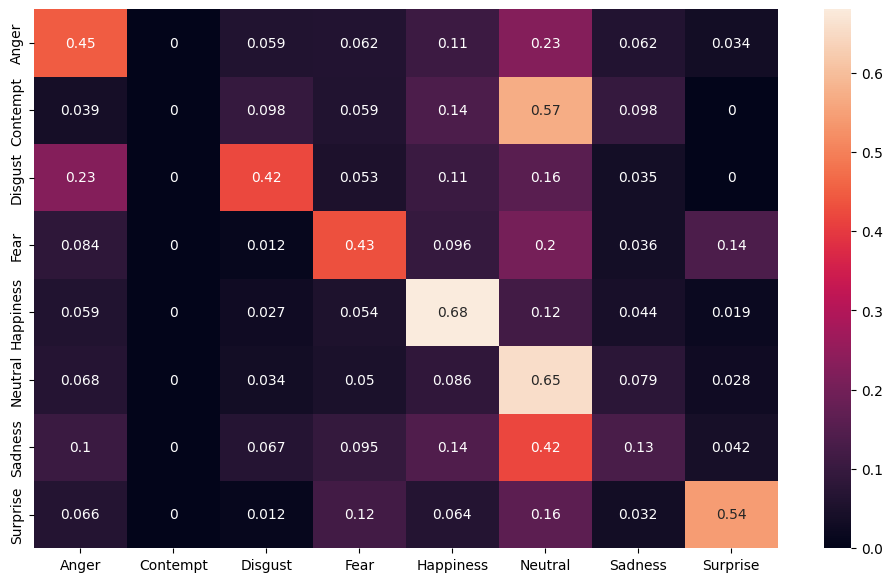

In [59]:
import matplotlib.pyplot as plt
cf_matrix = confusion_matrix(y_true, y_pred)
df_cm = pd.DataFrame(cf_matrix / np.sum(cf_matrix, axis=1)[:, None], index = [i for i in classes],
                     columns = [i for i in classes])
plt.figure(figsize = (12,7))
sn.heatmap(df_cm, annot=True)
plt.savefig('output.png')

In [37]:
train_labels = pd.read_csv("data2/train.csv")

In [40]:
train_labels["emotion"].value_counts()

emotion
5.0    9277
4.0    6775
7.0    3205
6.0    3162
0.0    2219
3.0     586
2.0     171
1.0     148
Name: count, dtype: int64

In [60]:
from sklearn.metrics import precision_score, recall_score

In [61]:
print(precision_score(y_true, y_pred, average = "micro"))

0.5531765037329202


In [62]:
print(precision_score(y_true, y_pred, average = "macro"))

0.36496525415366543


/home/youssef/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [63]:
print(recall_score(y_true, y_pred, average = "micro"))

0.5531765037329202


In [64]:
print(recall_score(y_true, y_pred, average = "macro"))

0.4135946704261555
